# UnSupervised-learning-final-project
## Wholesale Customers Dataset
## Kavitha Sundaram

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Downloaded this wholesale customer dataset from UCI Machine Learning Repository. 

The wholesale distributor operating  in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The dataset consist of 440 large retailers annual spending on 6 different  varieties of product in 3 different regions (lisbon , oporto, other) and across different sales channel ( Hotel, channel) 

DataSource:https://archive.ics.uci.edu/ml/datasets/wholesale+customers



## Contents:

* Imports:
* Description:
* EDA:
  1. Size,histogram
  1. correlation matrix
* Data Preprocessing:
* Clustering models
  1. K-Means: \
   1.1 Elbow\
   1.2 Silhouette\
   1.3 calinski_harabasz
  2. XGB Classifier
* Prediction
* Anaysis & Results
* Conclusion
* Reference

## Imports:

Below listed are the main libraries used in this project:
1. Pandas
2. NumPy
3. Seaborn
4. Plotly
5. scikit-learn
6. Matplotlib

In [80]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import silhouette_score as sil_score
import time
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
# Prints the current working directory
os.getcwd()
#changing my working directory as per project folder BBC files.
%cd "/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5510/final exam"


/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5510/final exam


In [81]:
#list of datafiles from UCI ML Data repository dataset
os.listdir("./")

['Wholesale customers data.csv']

## Description:

My goal is to use various clustering techniques to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.
Algorithms to be used, XGBoost classifier, k means clustering etc
To predict which region and which channel will spend more and which region and channel to spend less. 


Attribute Information:
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8) REGION: customers Region Lisnon, Oporto or Other (Nominal)

In [82]:
# Load in customers data 
cust_df = pd.read_csv("./Wholesale customers data.csv")
display(cust_df.info(),cust_df.head(),cust_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data:

Lets Check null values and data types of all variables for model analysis.

In [83]:
cust_df.isna().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [84]:
cust_df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

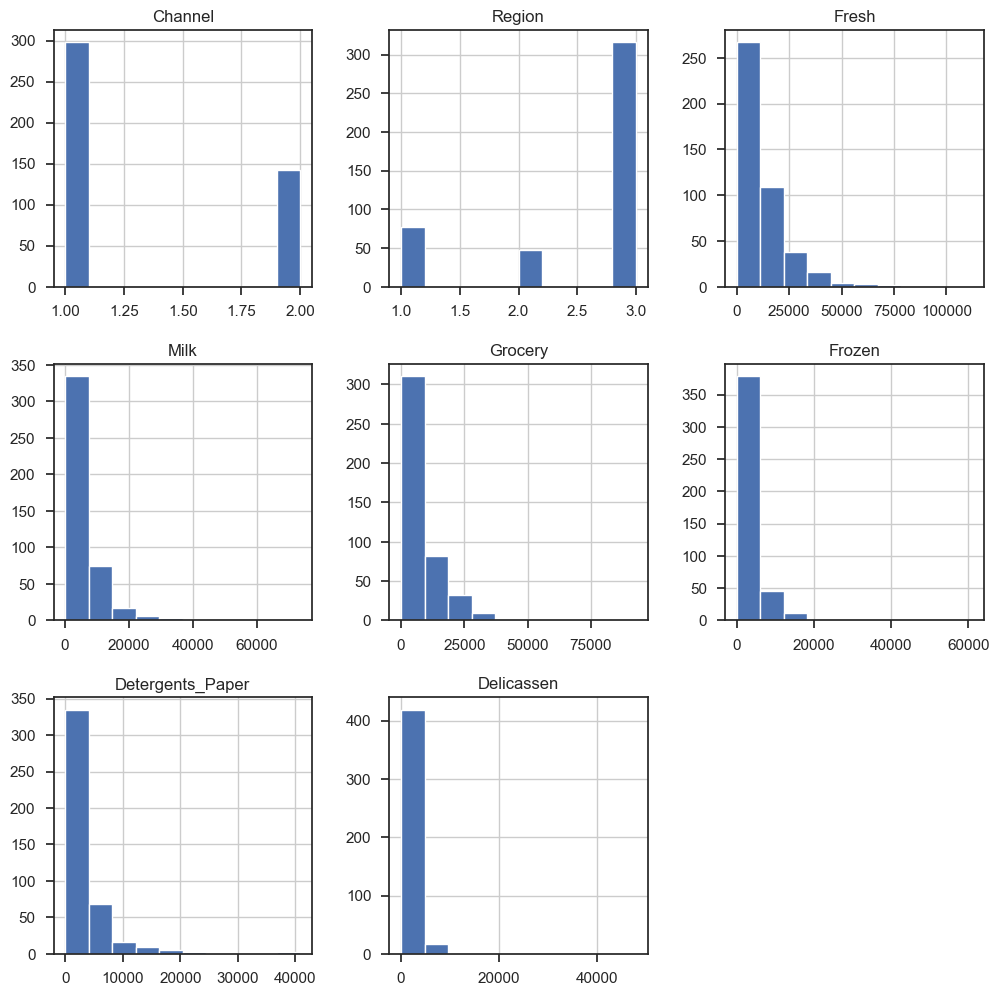

In [85]:
cust_df.hist(figsize=(12,12))

After analysing above histograms, we can easily divide our variables into 
1. categorical(channel,region)
2. numerical(Delicassen,detergents_paper,milk,grocery,frozen,fresh)

## Data PreProcessing:

In [86]:
corr = cust_df.corr()
corr.style.background_gradient(cmap='cubehelix')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


There is strong correlation between 'grocery' and 'detergents_paper' and customers who buy grocery along 
with detergents_paper spend more money in this two products.

In [87]:
cust_df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [88]:
cust_df['Channel'].value_counts()


Channel
1    298
2    142
Name: count, dtype: int64

1. There are totally 3 regions with 2 channels.
2. Lets specify each features with region and channel wise.


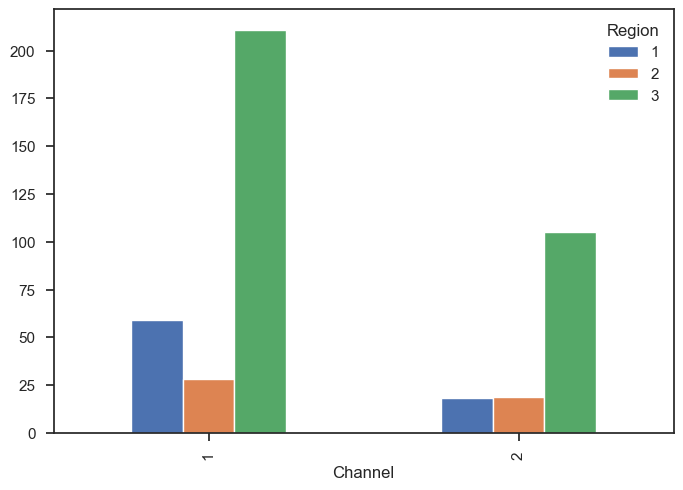

In [89]:
def categorical_df(x,y):
    pd.crosstab(cust_df[x],cust_df[y]).plot(kind='bar')
    plt.show()
categorical_df(x='Channel',y='Region')

1. From above categorical plot, we can define highest spending channel = 1 and Lowest spending channel = 2.
2. Highest spending Region = 3 and Lowest spending Region = 2

In [90]:
reg = cust_df.drop(columns=['Region'])
mean1 = reg.groupby('Channel').mean()
mean1.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
2,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44


| **Channel1**                                   | **Channel2** | 
|-------------------------------------------- |---------|
| Highest Spending = Fresh                  | Highest Spending = Grocery| 
| Lowest Spending = Detergents_paper        | Lowest Spending = Frozen | 

In [91]:
chan = cust_df.drop(columns=['Channel'])
mean2 = chan.groupby('Region').mean()
mean2.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9
2,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7
3,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6


| **Region1**                                 | **Region2**                  |       **Region3**           |
|-------------------------------------------- |------------------------------|-----------------------------|
| Highest Spending = Fresh                    | Highest Spending = Fresh     | Highest Spending = Fresh    |
| Lowest Spending = Delicassen                | Lowest Spending = Delicassen | Lowest Spending = Delicassen|

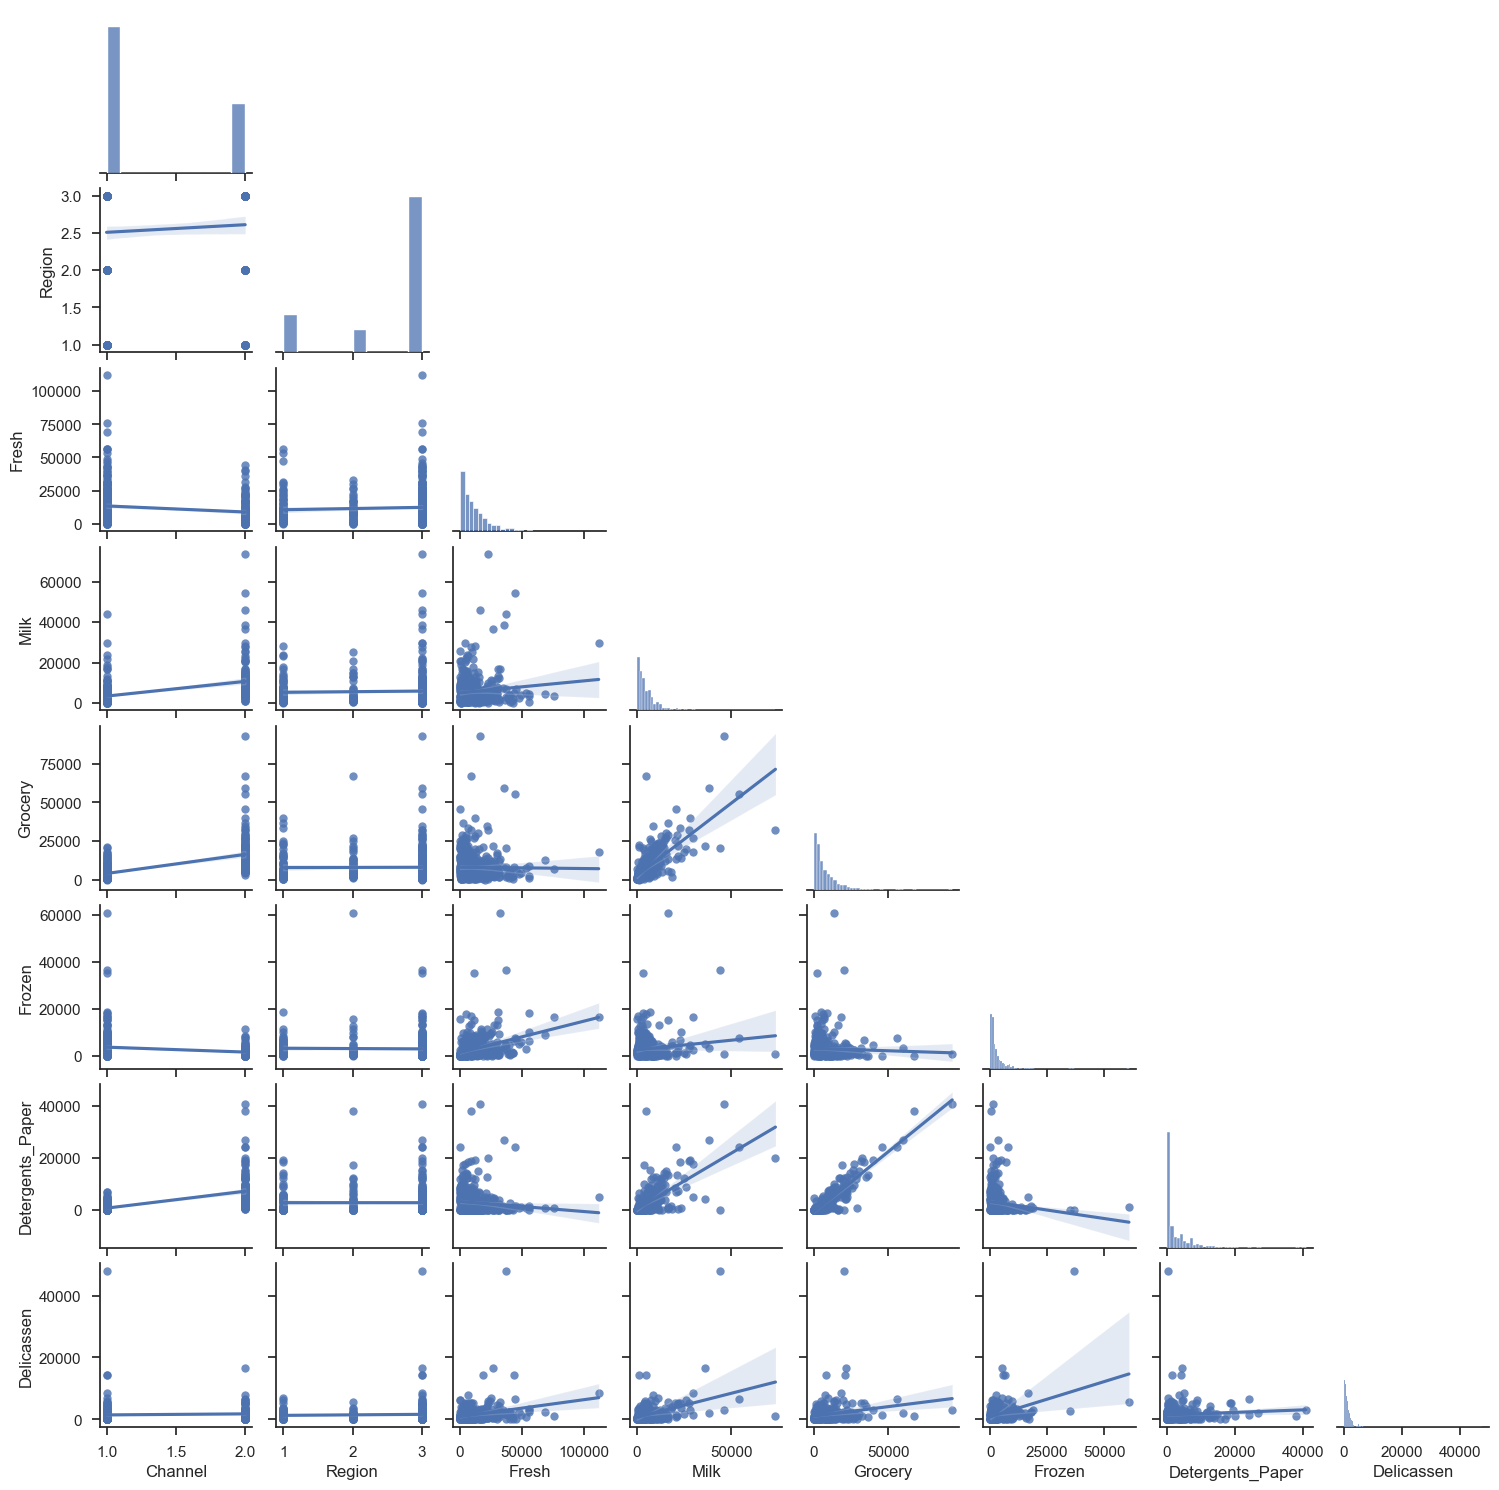

In [92]:
sns.set(style="ticks")
g = sns.pairplot(cust_df,corner=True,kind='reg')
g.fig.set_size_inches(15,15)

1. Grocery and Detergents_paper looks similar in pairplot models. So customers who buy grocery along with detergents_paper products as wholesale.

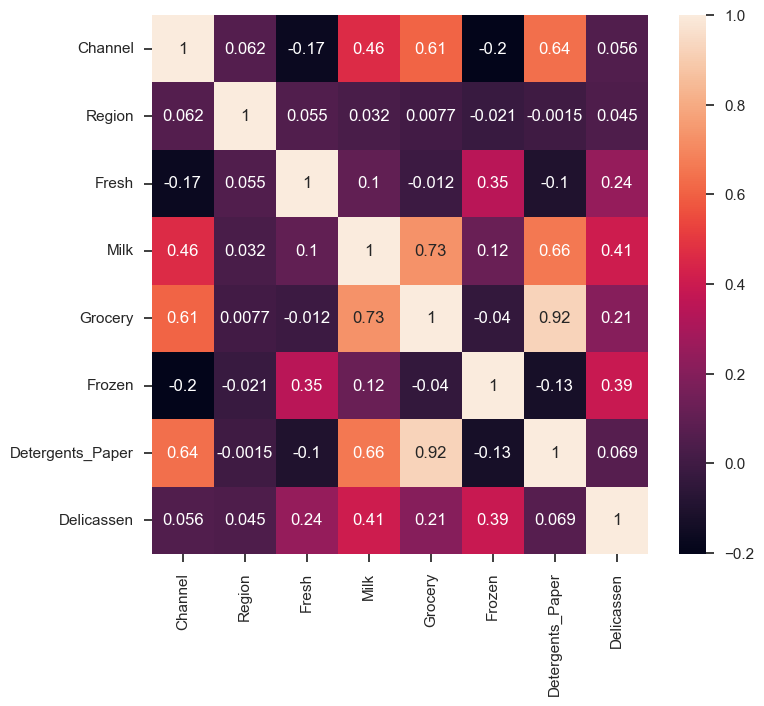

In [93]:
plt.figure(figsize=(8, 7))
sns.heatmap(cust_df.corr(method='pearson'), annot=True);

1. Most of the varuables are uncorrelated. as you can see **Grocery** and **Detergents_Paper** are positively correlated.
2. 92% strong correlation between grocery and detergents products.

<Figure size 1800x2700 with 0 Axes>

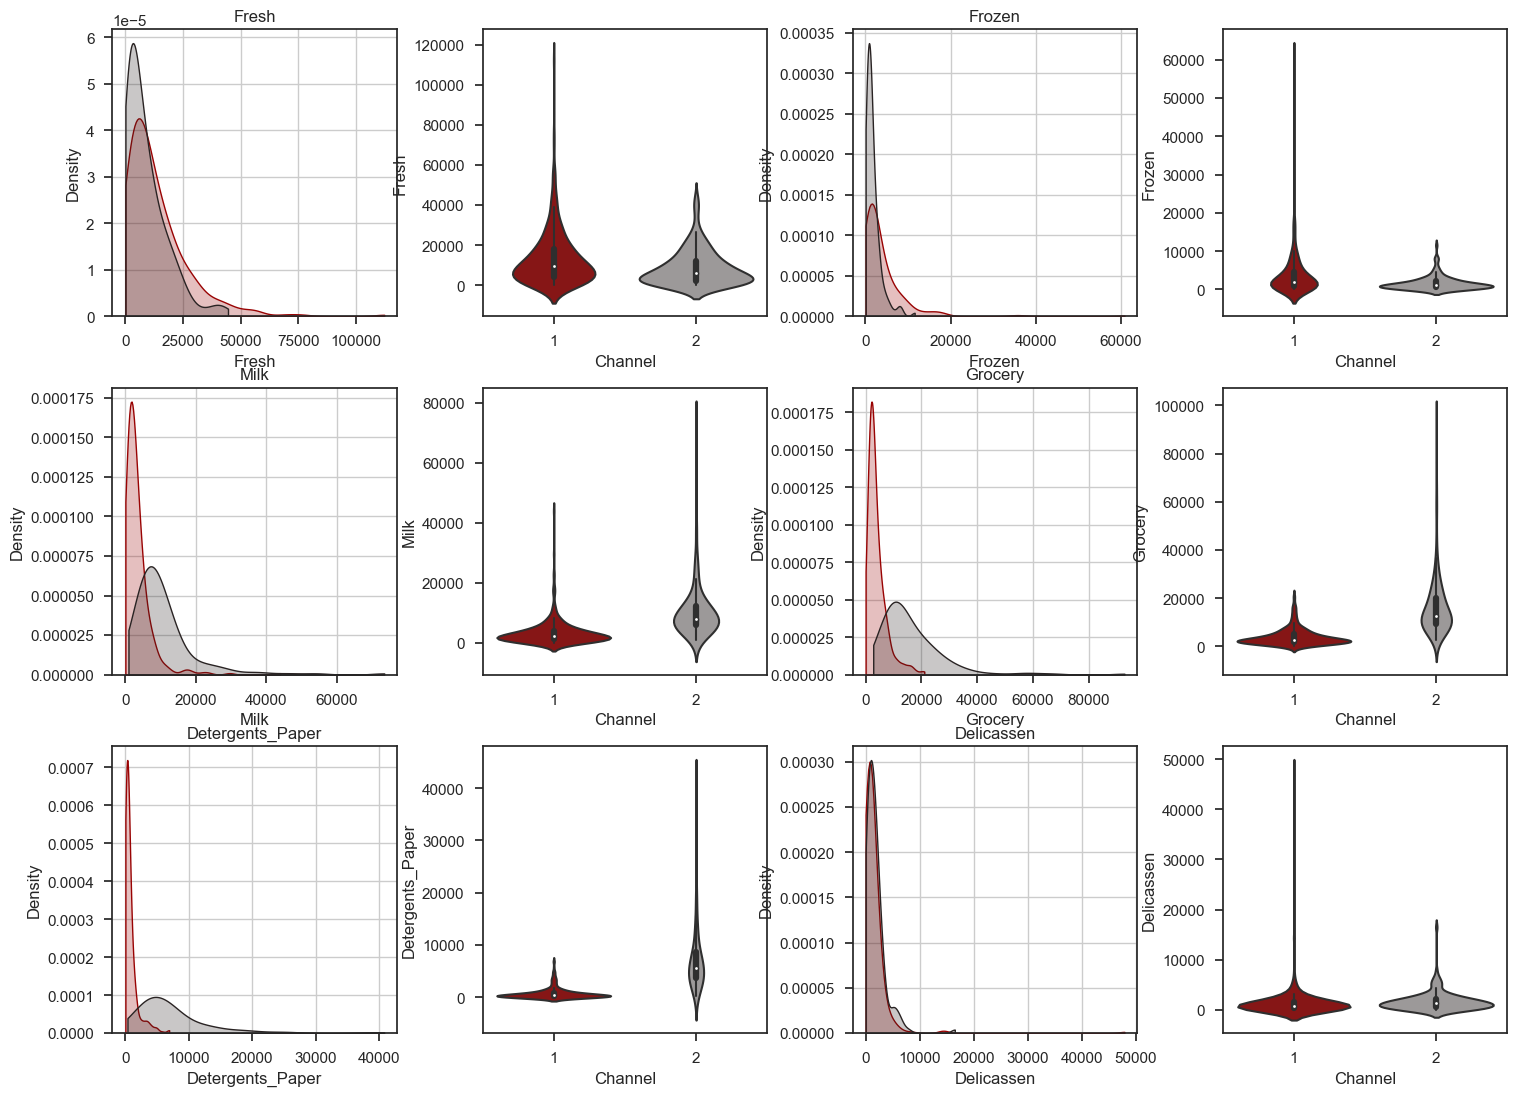

In [94]:
numerical = ["Fresh", "Frozen", "Milk", "Grocery", "Detergents_Paper", "Delicassen"]
categorical = ["Channel", "Region"]
plt.figure(figsize=(18, 27))

plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(cust_df.loc[cust_df["Channel"]==1, col], color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(cust_df.loc[cust_df["Channel"]==2, col],  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.violinplot(y = col, data = cust_df, x="Channel", palette = ["#990303", "#9C9999"])    

<Axes: xlabel='Region', ylabel='Delicassen'>

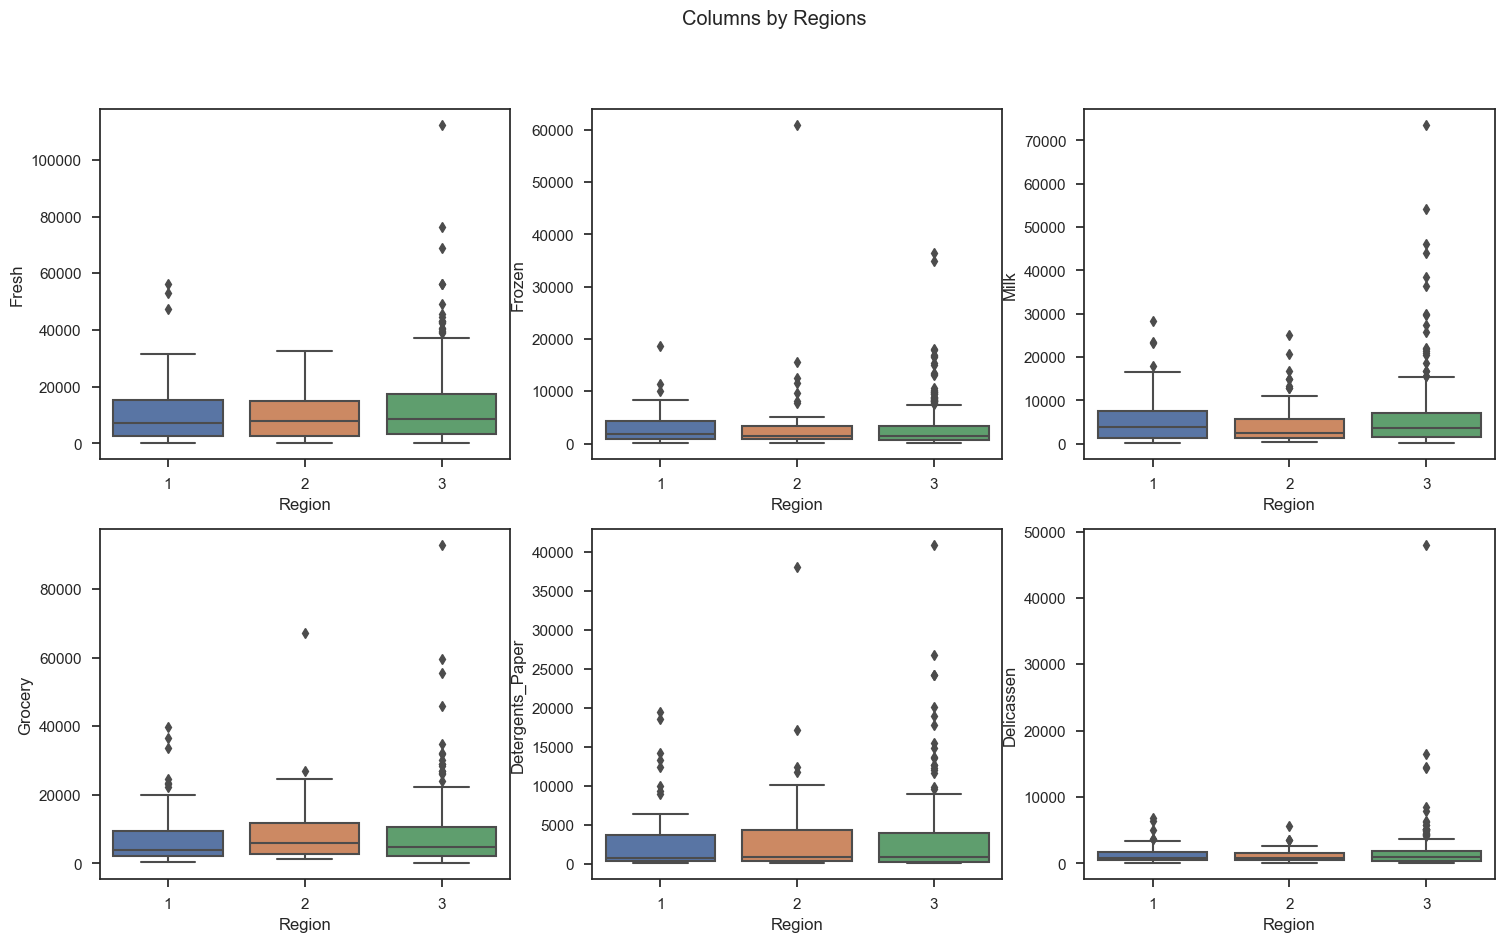

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Columns by Regions')

sns.boxplot(ax=axes[0, 0], data=cust_df, x='Region', y='Fresh')
sns.boxplot(ax=axes[0, 1], data=cust_df, x='Region', y='Frozen')
sns.boxplot(ax=axes[0, 2], data=cust_df, x='Region', y='Milk')
sns.boxplot(ax=axes[1, 0], data=cust_df, x='Region', y='Grocery')
sns.boxplot(ax=axes[1, 1], data=cust_df, x='Region', y='Detergents_Paper')
sns.boxplot(ax=axes[1, 2], data=cust_df, x='Region', y='Delicassen')


We have some outliers in the data.

In [96]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
a= cust_df.apply(cv)
a

Channel              35.385342
Region               30.445029
Fresh               105.391792
Milk                127.329858
Grocery             119.517437
Frozen              158.033238
Detergents_Paper    165.464714
Delicassen          184.940690
dtype: float64

1. Fresh items have lowest coefficient, so it is consistent and \
Delicassen is inconsistent with highest coefficent variation in dataset provided.

## Clustering Models:
The k-means algorithm is generally the most known and used clustering method. There are various extensions of k-means to be proposed in the literature. Although it is an unsupervised learning to clustering in pattern recognition \
and machine learning, the k-means algorithm and its extensions are always influenced by initializations with \
a necessary number of clusters a priori. That is, the k-means algorithm is not exactly an unsupervised \
clustering method. In this paper, we construct an unsupervised learning schema for the k-means algorithm \
so that it is free of initializations without parameter selection and can also simultaneously find an \
optimal number of clusters. That is, we propose a novel unsupervised k-means (U-k-means) clustering \
algorithm with automatically finding an optimal number of clusters without giving any initialization and parameter selection. 

In [99]:
indices = [22,154,398]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(cust_df.loc[indices], columns=cust_df.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
# Scale the data using the natural logarithm
log_data = np.log(cust_df.copy())
# Scale the sample data using the natural logarithm
log_samples = np.log(samples)
display(log_samples)


Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.098612,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,0.0,1.098612,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


### 1. K-Means:
K-means is a great algorithm that is easily human-comprehensible. \
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into \
different clusters. Here K defines the number of pre-defined clusters that need to be created in the process,\
as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.\
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid.\
The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.\
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center,\
create a cluster.

Next, I'll need to standardize the selected features so that they have the same mean and variance. \
Creating this standardization step is important because K-Means clustering is sensitive to the \
scale of the data. I can use the StandardScaler function from the scikit-learn library to standardize the data.

In [101]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cust_df)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


We have initialized two clusters and pay attention – \
the initialization is not random here. We have used the k-means++ initialization which \
generally produces better results as we have discussed in the previous section as well.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [103]:
model = KMeans(init='k-means++',n_clusters=3,n_init=10,max_iter=300,tol=0.0001,verbose=0,random_state=42,copy_x=True,algorithm='auto')

model.fit(scaled_df)
model.inertia_

2149.283956221759

We got an inertia value of almost 2149. Now, let’s see how we can use the elbow method to \
determine the optimum number of clusters in Python.

We will first fit multiple k-means models, and in each successive model, \
we will increase the number of clusters. We will store the inertia value of each model and \
then plot it to visualize the result:

Text(0, 0.5, 'Inertia or SSE')

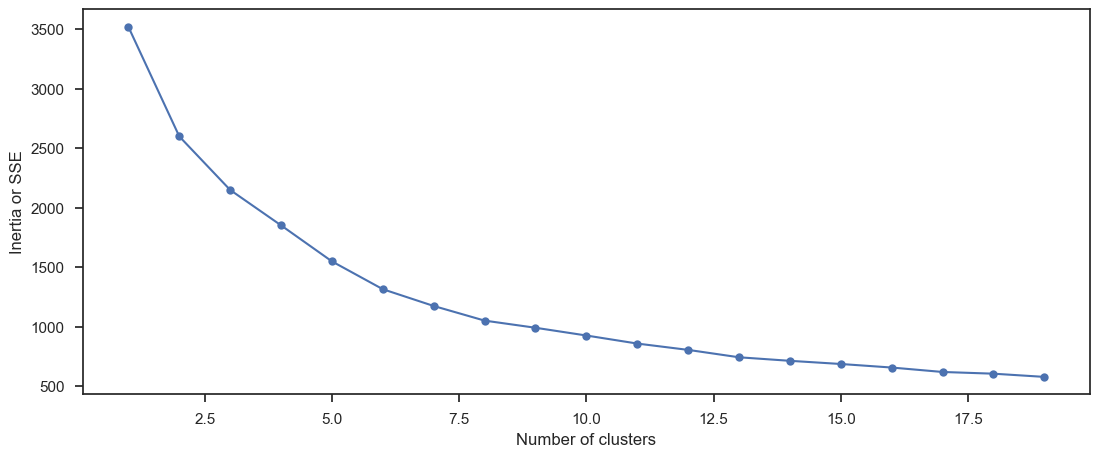

In [104]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               
               verbose=0,
               random_state=42,
               copy_x=True,
               
               algorithm='auto')

    model.fit(scaled_df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')


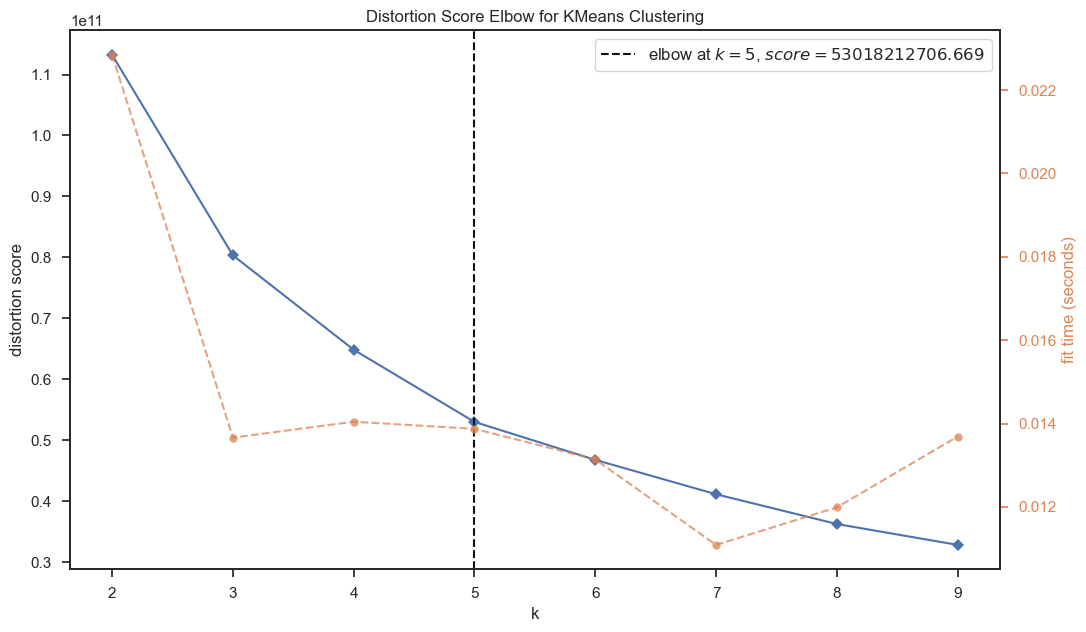

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
plt.figure(figsize = (12, 7))
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(cust_df)
visualizer.show()

As you can see from above plot, elbow visulaizer is clearly showing cluster k =5 of score 530...\
To find optimal number of clusters, elbow and silhouette methods are used.

In [106]:
model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
              
               verbose=0,
               random_state=42,
               copy_x=True,
              
               algorithm='auto')

model.fit(scaled_df)
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(scaled_df)
cust_df['cluster'] = pred
print('\nCount in each cluster: \n', cust_df['cluster'].value_counts())



SSE:  1548.8659343652669

Centroids: 
 [[ 1.44865163e+00  1.69928497e-01 -3.14722179e-01  4.52466342e-01
   6.66146634e-01 -3.51066687e-01  6.83203927e-01  4.65876480e-02]
 [-6.80159888e-01  5.90668285e-01  1.49701883e-01 -3.38970651e-01
  -4.35787592e-01  8.62596306e-02 -4.39578802e-01 -7.92402039e-02]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01 -5.58343155e-02  1.80335587e+00  3.33298726e+00
   9.42518505e-01  9.40980070e+00 -4.46409015e-01  8.96415723e+00]]

Count in each cluster: 
 cluster
1    211
0    126
2     91
3     10
4      2
Name: count, dtype: int64


There are 211 data points belonging to cluster 2\
126 to cluster 1, \
91 data points belonging to cluster 3 and \
10 to cluster 4 and 2 to cluster 5.

In [107]:
metrics.silhouette_score(scaled_df, model.labels_)

0.3451742496217193

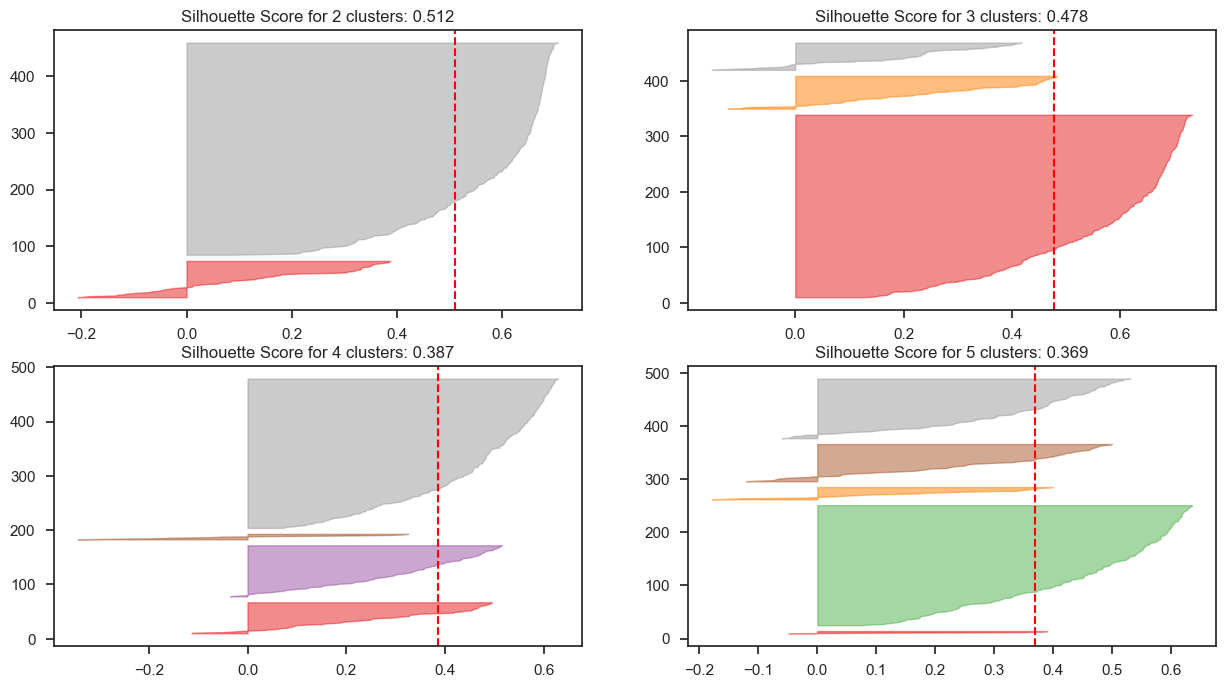

In [108]:
# Silhouette Scores on Scaled Data
from yellowbrick.cluster import SilhouetteVisualizer
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(cust_df)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(cust_df, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)

Silhouette score for cluster 2 = 0.512\
cluster 3 = 0.478\
cluster 4 = 0.412\
cluster 5 = 0.388\
Highest score in cluster 2.

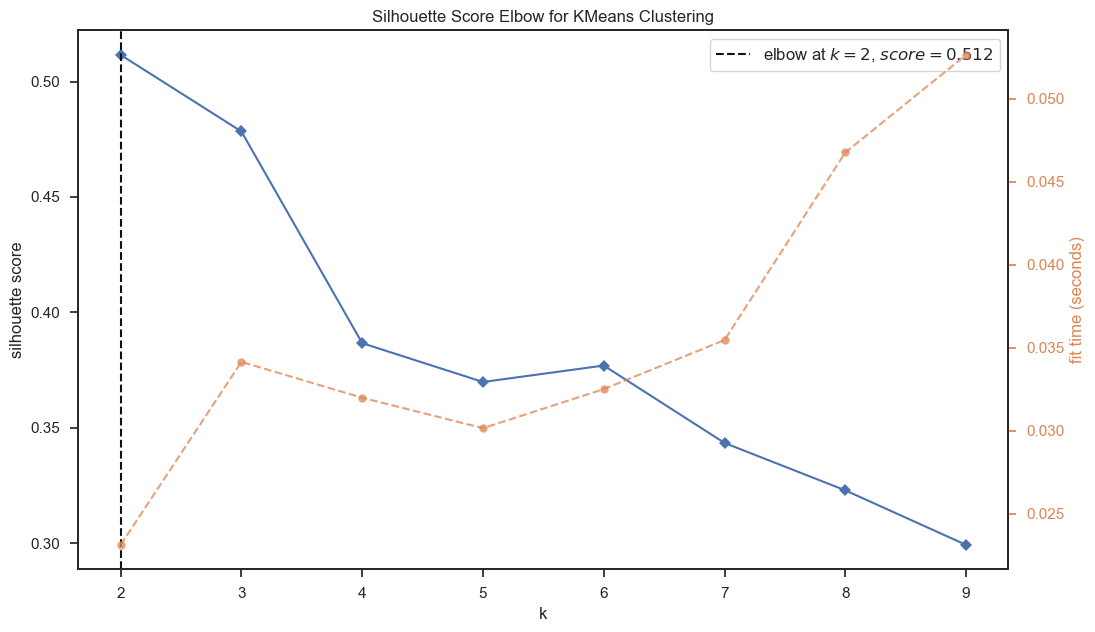

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [109]:
plt.figure(figsize = (12, 7))
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10),metric='silhouette', timings= True)
 
visualizer.fit(cust_df)
visualizer.show()

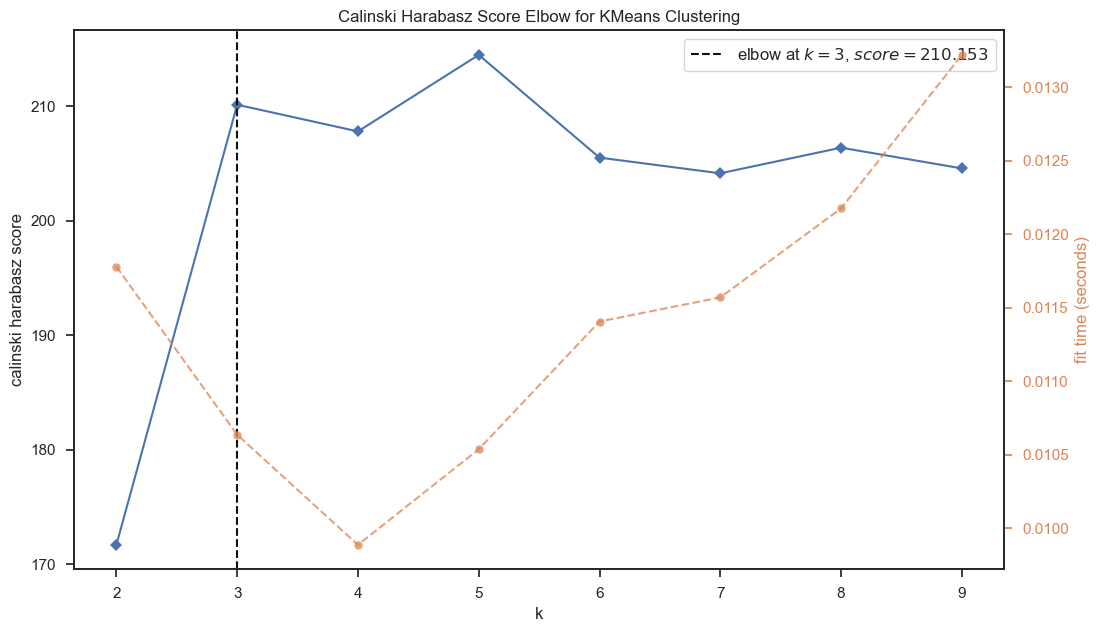

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [110]:
#'calinski_harabasz'
plt.figure(figsize = (12, 7))
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10),metric='calinski_harabasz', timings= True)
 
visualizer.fit(cust_df)
visualizer.show()

In [111]:
#Scatterplot of the clusters
df1=cust_df[["Fresh","Milk","Frozen","Detergents_Paper","Delicassen"]]
X=df1[["Fresh","Frozen"]]
#The input data
X.head()

#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,label
0,12669,9656,214,2674,1338,4
1,7057,9810,1762,3293,1776,0
2,6353,8808,2405,3516,7844,0
3,13265,1196,6404,507,1788,4
4,22615,5410,3915,1777,5185,4


After labeling models , we can optimize each feature and find perfect clusters around two parameters.\
Lets look into Fresh and Frozen.

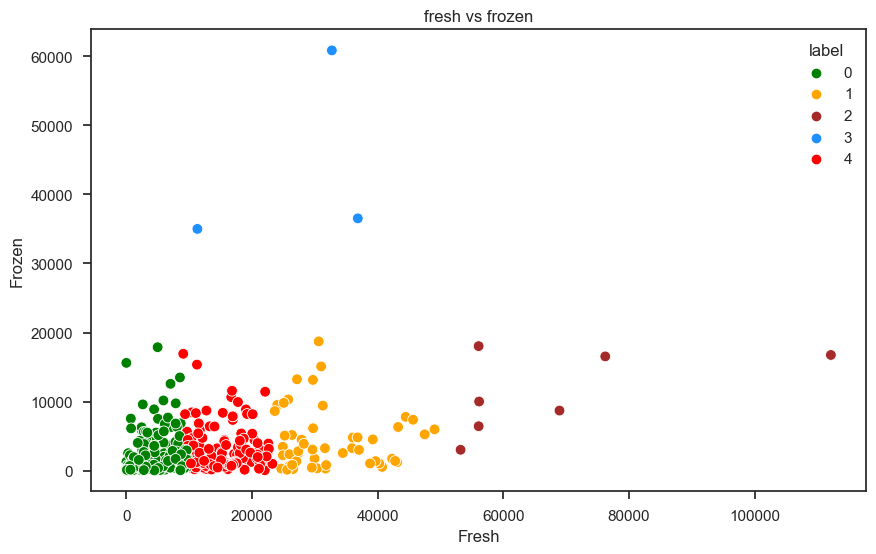

In [112]:

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Fresh',y = 'Frozen',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Fresh')
plt.ylabel('Frozen') 
plt.title('fresh vs frozen')
plt.show()

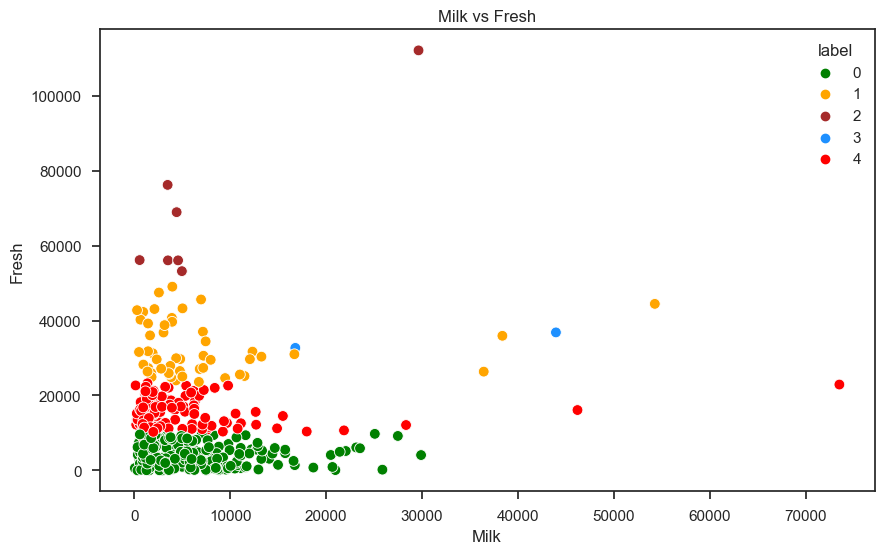

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Milk',y = 'Fresh',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Milk')
plt.ylabel('Fresh') 
plt.title('Milk vs Fresh')
plt.show()

### 2. PCA:
Cluster visualization with Principal Component Analysis - PCA
We cannot visualize our clusters that easily beacause our dataset is multidimentional. So we'll use the Principal Component Analysis to reduce our dataset to a two dimentional one, then add our identified clusters to visualize them.

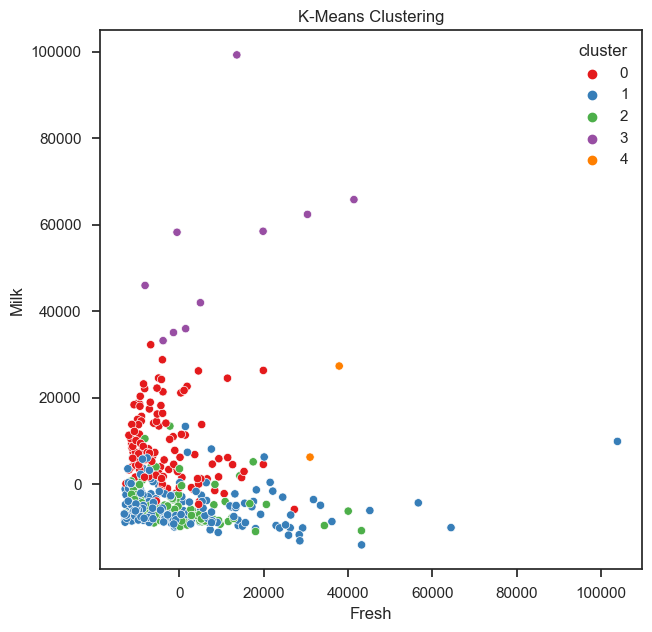

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(cust_df)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['Fresh','Milk']
pca_clustering = pd.concat([pc_df,cust_df['cluster']],axis=1)
plt.figure(figsize=(7,7))
sns.scatterplot(x='Fresh', y='Milk', hue= 'cluster', data=pca_clustering,palette='Set1').set_title('K-Means Clustering')
plt.show()

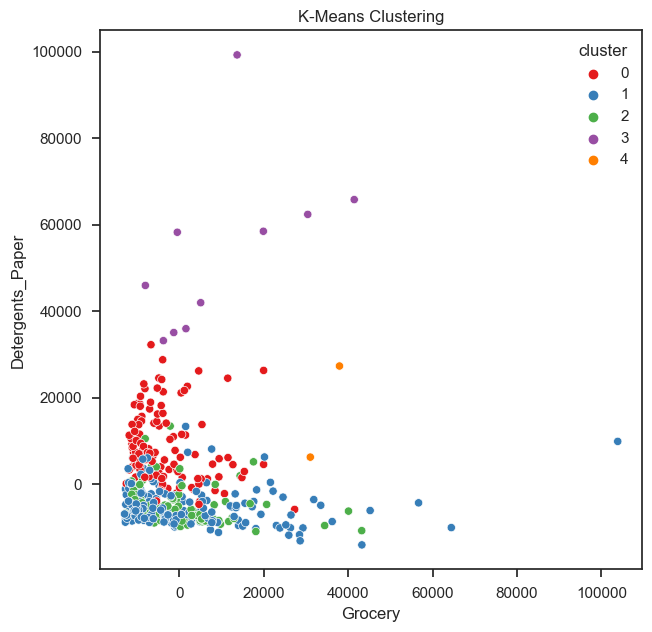

In [115]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(cust_df)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['Grocery','Detergents_Paper']
pca_clustering = pd.concat([pc_df,cust_df['cluster']],axis=1)

plt.figure(figsize=(7,7))
sns.scatterplot(x='Grocery', y='Detergents_Paper', hue= 'cluster', data=pca_clustering,palette='Set1').set_title('K-Means Clustering')
plt.show()


### 3. XGB:
implemented XGBoostclassifier with Python and Scikit-Learn to classify the customers from two different channels .

In [116]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [117]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 98.41% (1.16%)


### Results and Analysis :

1. **Elbow Method**: In this method, we plot the WCSS (Within-Cluster Sum of Square)against different values of the K, and we select the value of K at the elbow point in the graph, i.e., after which the value of WSCC remains constant (parallel to the x-axis).\
Result: Silhouette Scores on scaled data \
**Cluster 2 = 0.512(Highest Score)**
Cluster 3 = 0.478\
Cluster 4 = 0.412\
Cluster 5 = 0.388\
Inertia value = 2149 
2. The **silhouette Method** is also a method to find the optimal number of clusters and interpretation and validation of\ consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that \
measure how much a point is similar to its own cluster compared to other clusters.\
Result: Sihoute score for scaled data = 0.3451\
Cluster 1 = 126\
Cluster 2 = 211(Highest Score)\
Cluster 3 = 91\
Cluster 4 = 10 and ...\
SSE = 1548.8659343652669 
3. The **Calinski-Harabasz** index (also known as the Variance Ratio Criterion) is calculated as a ratio of the\
sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters \
(where the dispersion is the sum of squared distances).
1. Then started optimizing values using elbow method, K=5, score as 0.530\
Sihoutte method, k = 2 , score as 0.512 \
calinski_harabasz method, k = 3, score as 0.221\
Accuracy with **XGB Classifier** = 97.50 




## CONCLUSION:


Best overall model seems to be the K-Means Elbow Method with K = 5 optimized value with score = 0.530 on the sampled dataset, that delivers the best results in terms of accuracy .\
I have used almost all Clustering K-means algorithm models to predict the score of each customers features according to the feature provided with dataset.\
I also want to look into feature selection for logistic regression algorithms. \
There are some other clustering models as PCA, principle component analysis and find centroid and \
optimize along with dataset untill we find the center point and NMF non- matrix factorization methods to find optimal value in data points in future.\
So, the customers who bought grocery along with detergents paper spends more money than other products like frozen \
Fresh and frozen products are bought least . We can make discounts for grocery and detergents products for higher sales in wholesale customers.

### GITHUB REPOSITORY URL

https://github.com/kavishant87/UnSupervised_Final_5510_Project

### REFERENCES:

https://datagy.io/seaborn-catplot/ \
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 \
https://www.statology.org/coefficient-of-variation-in-python/#:~:text=CV%20%3D%20%CF%83%20%2F%20%CE%BC,%CE%BC%3A%20The%20mean%20of%20dataset\
https://www.kaggle.com/code/farhanmd29/unsupervised-learning/notebook\
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ \
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad#:~:text=Calculating%20gap%20statistic%20in%20python,with%20varying%20number%20of%20clusters.